# Exploring some ROC analysis

This should be deleted - almost certainly

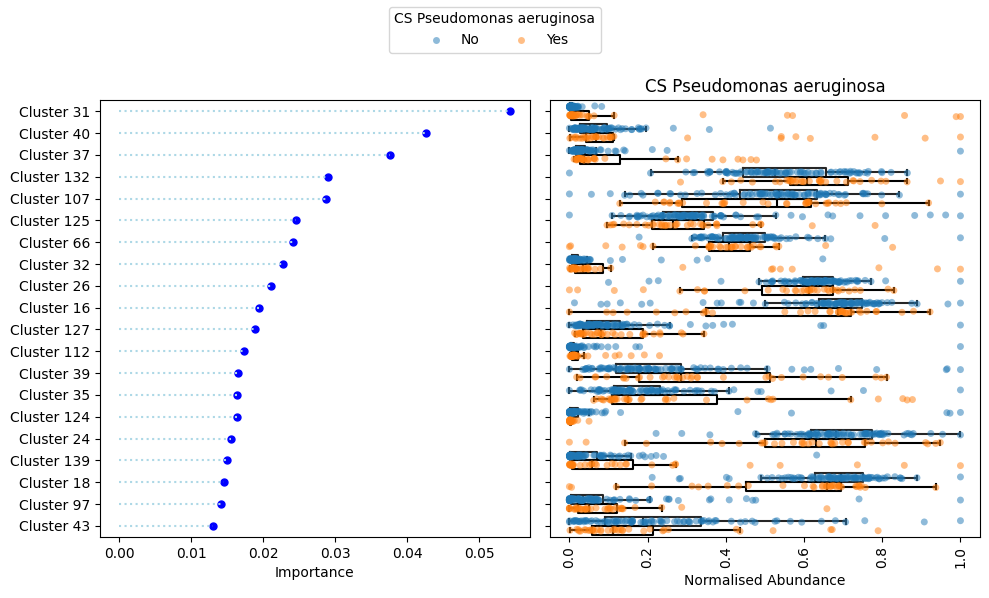

In [23]:
import os
import sys
from socket import gethostname

hostname = gethostname()

if hostname.startswith('hpc-node'):
    IN_DEEPTHOUGHT = True
    sys.path.append('..')
else:
    IN_DEEPTHOUGHT = False
from cf_analysis_lib.load_libraries import *
import cf_analysis_lib

sequence_type = "MGI"
datadir = '..'
sslevel = 'subsystems_norm_ss.tsv.gz'
taxa = "family"

df, metadata = cf_analysis_lib.read_the_data(sequence_type, datadir, sslevel='subsystems_norm_ss.tsv.gz', taxa="family")

outdir = 'pseudomonas'

encoder_models = 'cluster_gbrfs'
if not os.path.exists(os.path.join(encoder_models, 'clusters.json')):
    print("Please run the autoencoder code before trying to load the models.", file=sys.stderr)
    exit(1)

if not os.path.exists(os.path.join(encoder_models, 'pc_df.tsv')):
    print("Please create and save the PCA before trying to load the models.", file=sys.stderr)
    exit(1)

with open(os.path.join(encoder_models, 'clusters.json'), 'r') as file:
    data = json.load(file)
tmpjsondf = pd.DataFrame(list(data.items()), columns=['Cluster', 'Feature'])
cluster_assignments = tmpjsondf.explode('Feature').reset_index(drop=True)
cluster_assignments['Cluster'] = cluster_assignments['Cluster'].astype(int)

pc_df = pd.read_csv(os.path.join(encoder_models, 'pc_df.tsv'), sep="\t", index_col=0)

#intcol = 'Pseudomonas Culture' # note these two columns have the same information, but 'CS_Pseudomonas aeruginosa' is a category, while 'Pseudomonas culture' is a float!
intcol = 'CS_Pseudomonas aeruginosa'

intcol_title = replace_index.sub('', intcol).replace('_', ' ')
merged_df = pc_df.join(metadata[[intcol]]).dropna(subset=intcol)

categorical_data, custom_labels = cf_analysis_lib.create_custom_labels(metadata, intcol, merged_df)

X = merged_df.drop(intcol, axis=1)
y = merged_df[intcol]

if categorical_data:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_classifier_model(X, y)
  met = 'classifier'
else:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_regressor_model(X, y)
  met = 'regressor'


cf_analysis_lib.plot_one_top_feature(merged_df, feature_importances_sorted, intcol, intcol_title, custom_labels)


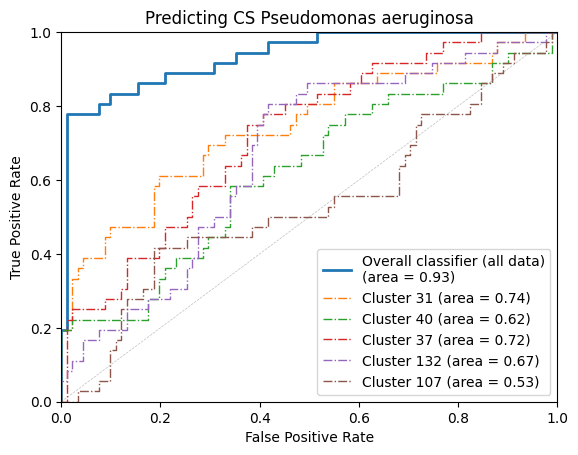

In [24]:
plt = cf_analysis_lib.plot_roc_curves(model, X, y, feature_importances_sorted, met, intcol_title)
plt.show()

In [3]:
X

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,...,Cluster 141,Cluster 142,Cluster 143,Cluster 144,Cluster 145,Cluster 146,Cluster 147,Cluster 148,Cluster 149,Cluster 150
1068841_20180306_S,276.176615,302.702198,1546.961129,1244.654020,97582.527423,4407.930069,1853.665398,715.507023,1638.820467,2314.236268,...,147.319228,-3.715643,-16.828942,-0.620425,-1391.234421,-1243.923904,-60.174780,-3438.957859,-31.329157,-147.293113
1447437_20171212_S,2705.663672,4690.862862,1661.627899,715.710503,-53458.096239,-392.542683,-1920.800676,-45.881704,-1404.573200,-1949.069093,...,-275.248829,-9.682479,-41.156992,-0.995247,-2240.140070,-1260.331553,-45.982448,-3971.187800,20.345835,-48.990355
1128691_20171206_S,-603.660074,-4577.510659,-4420.313788,-4958.557622,-195353.148806,-2374.194484,-1545.660627,-1725.120119,-3424.555171,-11010.612617,...,38.671835,-13.540291,14.266131,-1.015739,-3075.867772,-1213.717295,-77.174977,-3633.884812,-431.277056,-226.646071
1128691_20171218_S,-78.550058,-3104.503785,-3654.194165,-4454.618230,-173495.186399,-1922.264320,-1179.426731,-1548.680605,-3441.985162,-8616.698464,...,-98.707729,-13.540291,-45.479552,-1.015739,-2787.609881,-853.652167,-64.069528,-5121.928855,-250.796657,-341.952372
1128691_20180116_S,-1074.430518,-5052.322268,-5018.453689,-5474.994108,-215985.383039,-2426.518094,-1914.673485,-1949.175659,-3847.890163,-12551.371875,...,-76.610617,-13.540291,-45.068192,-1.015739,-3171.888089,-989.919971,-76.271303,-4705.279048,-397.884774,-371.751060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895293_20180502_S,400.288923,900.058161,-1016.027994,-970.041149,90351.749908,-1513.704455,-572.187928,8.526954,274.609764,-518.976032,...,58.990314,-7.311420,-1.255576,-1.068836,-1706.280443,-1258.491952,-58.988201,-3468.318984,336.712850,270.229166
896213_20180427_S,-987.386467,-686.446202,-1049.470879,-1568.508275,-42551.788144,2037.257278,-65.971431,79.719672,-52.559735,-2532.977561,...,-96.512542,12.686354,-4.258667,-1.965522,-627.714664,-1254.798853,-73.321593,-4013.291730,66.560372,-97.730236
913873_20180417_S,-761.521036,-446.796201,-160.302757,-852.755732,-1808.085607,3658.931376,-464.674844,-276.411538,-422.883787,1600.248043,...,209.381056,60.011847,-45.520979,54.562206,-292.270189,-1252.243469,873.912502,-3951.618096,187.499984,-414.887222
980574_20180403_S,-557.301890,135.000407,-522.286734,-236.762972,-2487.417301,-917.200466,-519.817611,-136.346160,-569.883346,-177.050005,...,122.158067,-7.041619,-11.163428,-0.800012,-1597.937366,-1239.243166,-44.131363,-3254.765058,-12.354979,1272.006312


In [4]:
y

1068841_20180306_S    0
1447437_20171212_S    1
1128691_20171206_S    1
1128691_20171218_S    1
1128691_20180116_S    1
                     ..
895293_20180502_S     1
896213_20180427_S     0
913873_20180417_S     0
980574_20180403_S     1
983493_20180123_S     1
Name: CS_Pseudomonas aeruginosa, Length: 127, dtype: category
Categories (2, int64): [0, 1]

In [5]:
n_estimators=10000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(
    max_features="sqrt",
    n_estimators=n_estimators,
    learning_rate=0.005,
    min_samples_leaf=10,
    max_depth=5
)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])
feature_importances_sorted = feature_importances.sort_values(by='importance', ascending=False)

In [6]:
X_train

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,...,Cluster 141,Cluster 142,Cluster 143,Cluster 144,Cluster 145,Cluster 146,Cluster 147,Cluster 148,Cluster 149,Cluster 150
748160_20180329_S,-1015.690836,-4796.168921,-4090.987401,3895.724720,-229540.817826,-2844.452798,-4311.961477,682.566697,2428.265500,-548.424526,...,800.942570,-8.960014,-39.871098,0.358932,-3098.645792,-1259.804886,91.653373,-2940.127955,-232.671678,-406.671504
748699_20180329_S,169.966069,1438.285736,1421.118985,2073.693549,163154.590052,-107.595196,1530.327142,541.932992,1678.024824,2061.285615,...,128.435107,-7.857649,-30.946915,-0.615352,-2500.330559,-1245.325251,-50.368366,-2562.617943,143.709980,-233.083580
1470026_20180502_S,-767.488535,-4304.910296,-3453.852600,-5518.916397,-231314.760739,-2891.985189,-4118.760751,-1026.396017,-3636.125630,-3161.441233,...,-59.414075,3.883176,8.123234,-1.876081,-437.587962,-1248.452637,-56.273962,26578.389205,-159.843210,188.698210
670829_20170922_S,-815.222395,-4093.604712,-2842.025780,-4365.561239,-197349.407780,-2612.635388,-3177.171061,-548.745448,-2135.031090,-2323.801254,...,37.452547,1.356433,93.407064,0.098078,-1018.798308,-1239.071641,-67.218484,-4546.503683,96.101186,-358.484983
634207_20180517_S,601.591050,-2796.561055,-624.191419,-3377.266285,-151324.535045,-2353.290432,-2925.628982,641.981821,-430.399694,-1899.731715,...,133.208315,-12.368860,-29.415982,-1.030779,-2371.672175,-1237.313918,-24.011307,-4403.699239,40.164791,-104.946387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788707_20180313_S,673.496975,2358.209581,-198.185262,2121.220593,132632.241973,239.370185,2183.246238,-67.652737,582.577510,2139.696561,...,25.606659,0.217989,34.460340,-2.458857,-1850.017026,-1252.389277,-73.434459,-1564.846527,65.336763,-119.443757
1565754_20180403_S,-166.665439,130.677100,1457.086028,732.272824,67296.336379,1722.930508,930.834289,352.917647,555.522341,1308.453626,...,71.195305,-6.978828,-1.693082,0.176643,-2379.919476,-1197.610590,-38.842801,-1835.088738,9.029099,992.906038
773911_20180130_S,530.949316,-1412.363992,701.030843,-186.518466,-54028.217911,490.032364,-888.389479,-174.524733,-587.407611,946.569833,...,2.897090,-6.350805,-14.535332,1.410210,-2269.668760,-1254.746594,-63.218401,-4051.541572,-173.201967,-183.749743
676138_20180323_S,-792.191236,-4140.636917,-3329.111126,-5129.432093,-203389.860664,-2754.656573,-3909.296820,-1043.786867,-3160.336117,-6318.063325,...,-279.252897,8.821386,-28.044032,-1.393823,-1375.111343,-1160.529086,-43.656469,-5031.671241,-82.127106,600.781548


In [7]:
y_train

748160_20180329_S     0
748699_20180329_S     0
1470026_20180502_S    0
670829_20170922_S     0
634207_20180517_S     0
                     ..
788707_20180313_S     0
1565754_20180403_S    1
773911_20180130_S     0
676138_20180323_S     1
788707_20171213_S     0
Name: CS_Pseudomonas aeruginosa, Length: 101, dtype: category
Categories (2, int64): [0, 1]

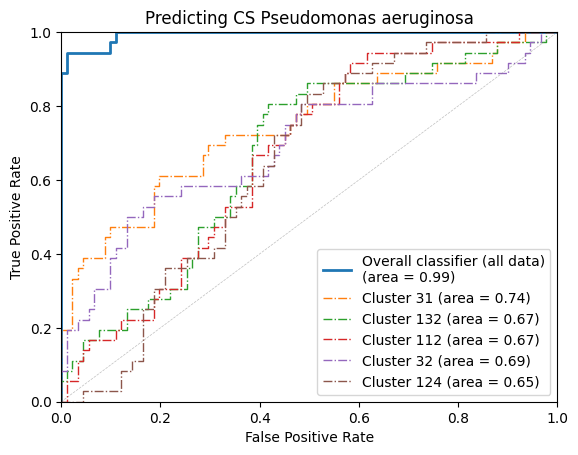

In [8]:
plt = cf_analysis_lib.plot_roc_curves(model, X, y, feature_importances_sorted, met, intcol_title)
plt.show()

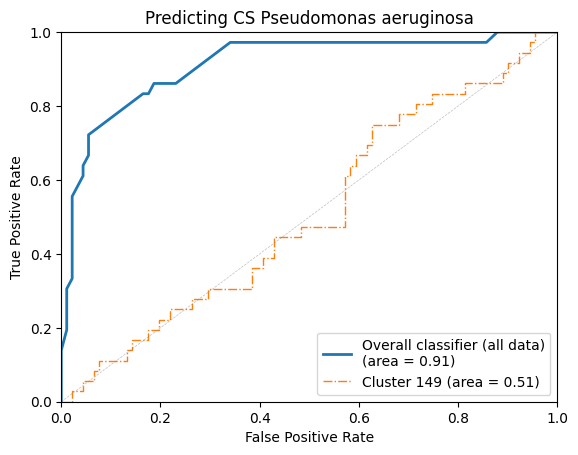

In [9]:
# now make a new model with just one column ... how does that do!

cluster = 'Cluster 149'
X_train, X_test, y_train, y_test = train_test_split(X[[cluster]], y, test_size=0.2, random_state=42)

mdl = GradientBoostingClassifier(
    max_features="sqrt",
    n_estimators=10000,
    learning_rate=0.005,
    min_samples_leaf=10,
    max_depth=5
)

mdl.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mdl.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Feature importance
feature_importances = pd.DataFrame(mdl.feature_importances_, index=[cluster], columns=['importance'])
feature_importances_sorted = feature_importances.sort_values(by='importance', ascending=False)
plt = cf_analysis_lib.plot_roc_curves(mdl, X[[cluster]], y, feature_importances_sorted, met, intcol_title)
plt.show()

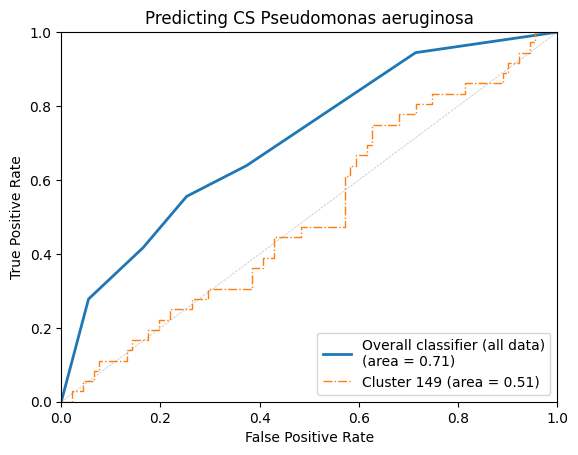

In [10]:
# now make a new model with just one column ... how does that do!

cluster = 'Cluster 149'
X_train, X_test, y_train, y_test = train_test_split(X[[cluster]], y, test_size=0.2, random_state=42)

mdl = GradientBoostingClassifier(
    max_features="sqrt",
    n_estimators=10,
    learning_rate=0.005,
    min_samples_leaf=10,
    max_depth=5
)

mdl.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mdl.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Feature importance
feature_importances = pd.DataFrame(mdl.feature_importances_, index=[cluster], columns=['importance'])
feature_importances_sorted = feature_importances.sort_values(by='importance', ascending=False)
plt = cf_analysis_lib.plot_roc_curves(mdl, X[[cluster]], y, feature_importances_sorted, met, intcol_title)
plt.show()

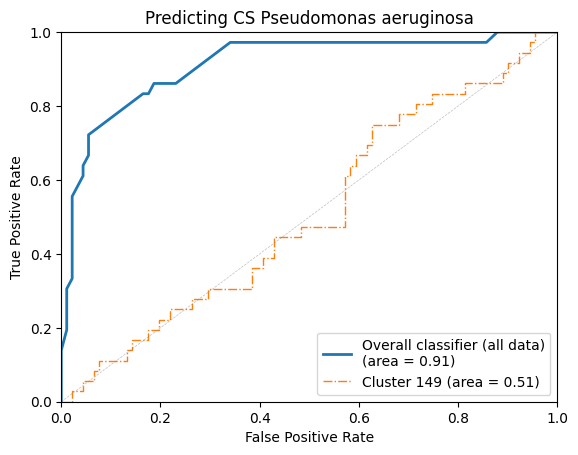

In [11]:
# now make a new model with just one column ... how does that do!

cluster = 'Cluster 149'
X_train, X_test, y_train, y_test = train_test_split(X[[cluster]], y, test_size=0.2, random_state=42)

mdl = GradientBoostingClassifier(
    max_features="sqrt",
    n_estimators=10000,
    learning_rate=0.005,
    min_samples_leaf=10,
    max_depth=5
)

mdl.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mdl.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Feature importance
feature_importances = pd.DataFrame(mdl.feature_importances_, index=[cluster], columns=['importance'])
feature_importances_sorted = feature_importances.sort_values(by='importance', ascending=False)
plt = cf_analysis_lib.plot_roc_curves(mdl, X[[cluster]], y, feature_importances_sorted, met, intcol_title)
plt.show()

# Some attempts from Chatty


1. Plot AUC vs. n_estimators

This helps visualize where overfitting begins.

How to interpret the plot?

If both curves rise and then level off, pick the value where the test AUC plateaus.
If train AUC keeps increasing but test AUC starts to drop, overfitting has begun—choose n_estimators just before this point.

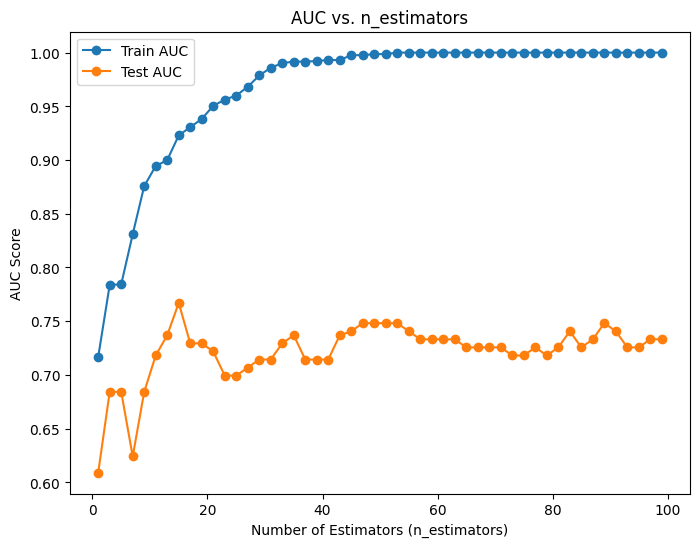

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


# note, this version uses just two columns to emphasise that with GBRF you can train to get an amazing AUC regardless of the data. The columns are somewhat random - just the last two
cluster = ['Cluster 149', 'Cluster 150']
X_train, X_test, y_train, y_test = train_test_split(X[cluster], y, test_size=0.2, stratify=y, random_state=42)

# uncomment this to train with all data (see below)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

n_estimators_range = np.arange(1, 100, 2)  # Try values from 10 to 500
train_auc = []
test_auc = []

# Train models with different n_estimators
for n in n_estimators_range:
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict probabilities
    train_pred = model.predict_proba(X_train)[:, 1]
    test_pred = model.predict_proba(X_test)[:, 1]

    # Compute AUC
    train_auc.append(roc_auc_score(y_train, train_pred))
    test_auc.append(roc_auc_score(y_test, test_pred))

# Plot results
plt.figure(figsize=(8,6))
plt.plot(n_estimators_range, train_auc, label="Train AUC", marker='o')
plt.plot(n_estimators_range, test_auc, label="Test AUC", marker='o')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("AUC Score")
plt.legend()
plt.title("AUC vs. n_estimators")
plt.show()


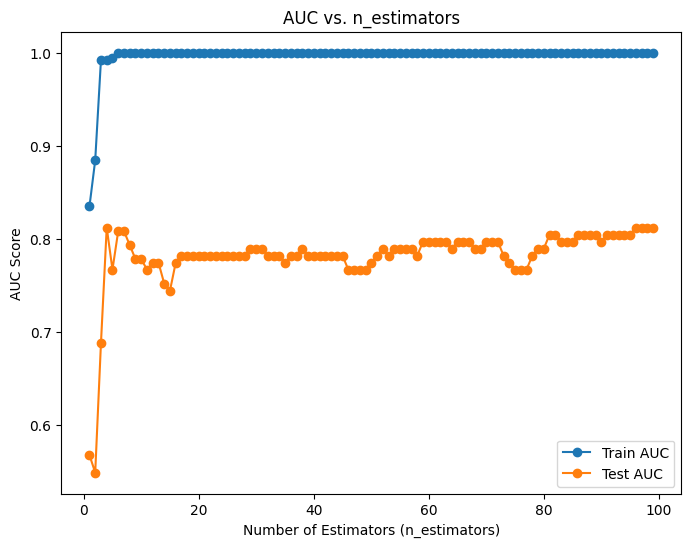

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


# note, this version uses just two columns to emphasise that with GBRF you can train to get an amazing AUC regardless of the data. The columns are somewhat random - just the last two
#cluster = ['Cluster 149', 'Cluster 150']
#X_train, X_test, y_train, y_test = train_test_split(X[cluster], y, test_size=0.2, stratify=y, random_state=42)

# uncomment this to train with all data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

n_estimators_range = np.arange(1, 100, 1)  # Try values from 10 to 500
train_auc = []
test_auc = []

# Train models with different n_estimators
for n in n_estimators_range:
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict probabilities
    train_pred = model.predict_proba(X_train)[:, 1]
    test_pred = model.predict_proba(X_test)[:, 1]

    # Compute AUC
    train_auc.append(roc_auc_score(y_train, train_pred))
    test_auc.append(roc_auc_score(y_test, test_pred))

# Plot results
plt.figure(figsize=(8,6))
plt.plot(n_estimators_range, train_auc, label="Train AUC", marker='o')
plt.plot(n_estimators_range, test_auc, label="Test AUC", marker='o')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("AUC Score")
plt.legend()
plt.title("AUC vs. n_estimators")
plt.show()


2. Use Early Stopping

Instead of manually tuning n_estimators, you can use early stopping to let the model stop when performance on validation data stops improving.

Why use this?

Automatically stops when n_estimators is too high.
Prevents overfitting by monitoring a validation set.


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize model with early stopping
model = GradientBoostingClassifier(n_estimators=100, validation_fraction=0.2,
                                   n_iter_no_change=10, random_state=42)

# Fit model (automatically stops when validation loss stops improving)
model.fit(X_train, y_train)

# Get the optimal number of trees
optimal_n = model.n_estimators_
print(f"Optimal number of trees: {optimal_n}")


Optimal number of trees: 13


3. Cross-Validation with Grid Search (More Comprehensive)

To confirm your choice, perform cross-validation with Grid Search to find the best n_estimators.

In [15]:
from sklearn.model_selection import GridSearchCV

# Define search space
param_grid = {'n_estimators': np.arange(1, 100, 1)}

# Set up grid search
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                           param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit grid search
grid_search.fit(X, y)

# Print the best n_estimators
print("Best n_estimators:", grid_search.best_params_['n_estimators'])


Best n_estimators: 73


In [16]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    model = GradientBoostingClassifier(n_estimators=500, validation_fraction=0.2,
                                       n_iter_no_change=10, random_state=42)
    model.fit(X_train_fold, y_train_fold)
    print(f"Optimal n_estimators for fold: {model.n_estimators_}")


Optimal n_estimators for fold: 31
Optimal n_estimators for fold: 22
Optimal n_estimators for fold: 14
Optimal n_estimators for fold: 25
Optimal n_estimators for fold: 11


In [17]:

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize model with early stopping
for vf in 0.2, 0.3, 0.4, 0.5:
    model = GradientBoostingClassifier(n_estimators=100, validation_fraction=0.2,
                                       n_iter_no_change=8, random_state=42)
    
    # Fit model (automatically stops when validation loss stops improving)
    model.fit(X_train, y_train)
    
    # Get the optimal number of trees
    optimal_n = model.n_estimators_
    print(f"Validation fraction: {vf} Optimal number of trees: {optimal_n}")


Validation fraction: 0.2 Optimal number of trees: 11
Validation fraction: 0.3 Optimal number of trees: 11
Validation fraction: 0.4 Optimal number of trees: 11
Validation fraction: 0.5 Optimal number of trees: 11
